#### Imports

In [1]:
import os,sys
import numpy as np
import scipy as sp
import pandas as pd
import tensorflow as tf 
import matplotlib as mlt
import joblib

import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
sys.path.append("../src")  # adjust path as needed
from data_generator import data_generator_simple_nn
from model import cnn_models
from tensorflow.keras import models
from sklearn.model_selection import train_test_split


### Load the data

In [2]:
output_dir = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/'

holdout = 15
nsteps = 10
x_resolution = 100
dim=1           
diff_cons = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2, 0.3, 0.5, 0.7]

data = data_generator_simple_nn(output_dir, holdout=holdout, nsteps = nsteps, 
                                dim=dim, csv=1, x_res=100, pos=1,
                                gen=True, diffusion_coeff=diff_cons)

X_train_base, Y_train_base, X_test, Y_test, x_grid, time_data = data.read_1d_gen_coeff()
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_base[:,:,:], 
                                                                Y_train_base, test_size=0.2, 
                                                                shuffle=False)

### Build the baseline CNN

In [3]:
model_instantiate = cnn_models(nx = x_resolution, 
                               dim=data.dim,
                               n_channels=12, 
                               kernel_size=4,
                               n_layer=3,
                               K=nsteps,
                               activation='relu')
my_model = model_instantiate.cnn_model_1d_gen_diff()
my_model.summary()

Model: "cnn_pos_enc_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 100, 32)        │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 100, 32)        │         5,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 100, 6)         │           966 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm (BatchNormalization)  │ (None, 100, 6)         │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │        76,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Reshape)                │ (None, 100, 1)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,642 (377.51 KB)

 Trainable params: 96,630 (377.46 KB)

 Non-trainable params: 12 (48.00 B)

### Train the Model

In [4]:
# Set learning rate here
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
my_model.build(input_shape=(None, 100, 3))  # assuming nx = 100
my_model.compile(loss='mse', optimizer=optimizer)

In [5]:
history = my_model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_validation, Y_validation))

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3982 - val_loss: 0.0998
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1260 - val_loss: 0.0737
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0480 - val_loss: 0.0584
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0242 - val_loss: 0.0492
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - val_loss: 0.0428
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - val_loss: 0.0394
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - val_loss: 0.0347
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0337
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0309
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0311
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0299
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

##### 🎨 Make the plots pretty 

In [6]:

plt.rcParams.update({
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

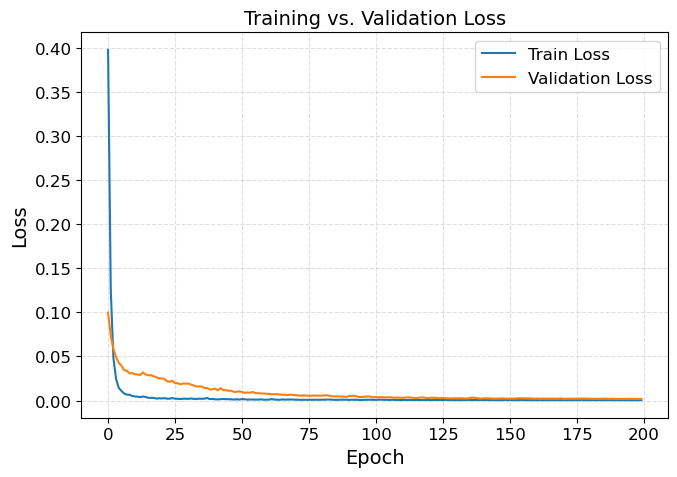

In [7]:

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Check the prediction of the Validation Set

In [8]:
u_pred = my_model.predict(X_validation)
print(u_pred.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
(137, 100, 1)


#### This is the Validation set prediction

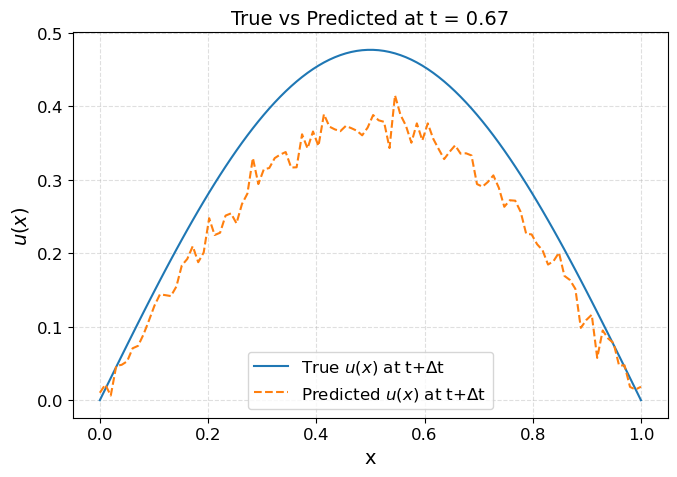

In [13]:
output_dir1 = '/Users/pushpita/Documents/ML Projects/Project3/data/csv_files/diffusion0.1/'

files = sorted([f for f in os.listdir(output_dir1) if f.startswith('data_') and f.endswith('.csv')])
nt = len(files)
var_t = np.zeros((nt))
for i, file in enumerate(files):
    data = pd.read_csv(os.path.join(output_dir1, file))
    var_t[i] = data["t"].iloc[0]



i=0
split_frac = int(0.8 * (nt - holdout))
ind_t = split_frac + i
time = np.round(var_t[ind_t], 2)
# which test example to look at

fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.plot(x_grid, Y_validation[i, :, 0], label='True $u(x)$ at t+Δt')
plt.plot(x_grid, u_pred[i, :, 0], '--', label='Predicted $u(x)$ at t+Δt')

plt.legend()
plt.xlabel('x')
plt.ylabel('$u(x)$')
plt.title("True vs Predicted at t = {}".format(time))
# Grid, legend, and tight layout
ax.grid(True, linestyle='--', alpha=0.4)
ax.legend(loc='best')
fig.tight_layout()

plt.show()

### Test set

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(135, 100, 1)


/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_39341/242305872.py:19: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(x_grid, (Y_test[0, :, 0]-u_pred_test[0, :, 0])/Y_test[0, :, 0], label='t+Δt')
/var/folders/0v/kl9fb13d2v51vwxc37zr5__00000gn/T/ipykernel_39341/242305872.py:20: RuntimeWarning: divide by zero encountered in divide
  ax2.plot(x_grid, (Y_test[4, :, 0]-u_pred_test[0, :, 0])/Y_test[4, :, 0], label='t+5Δt')


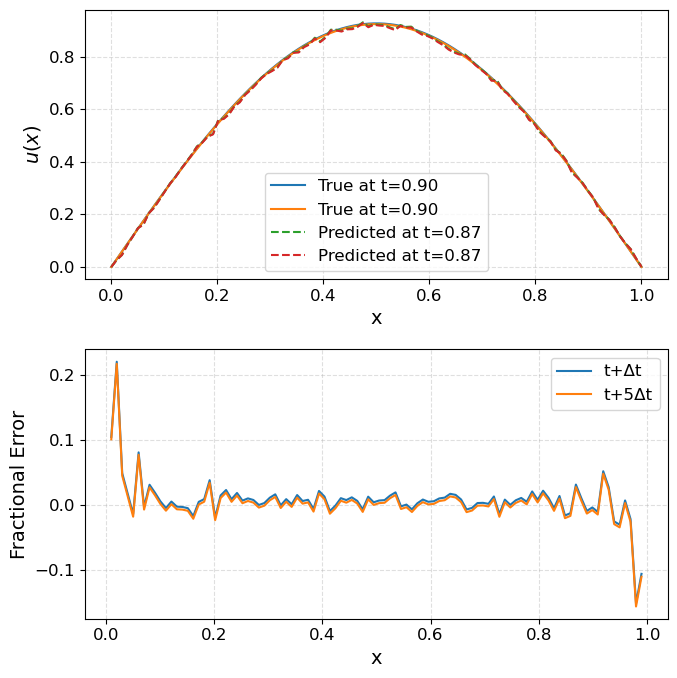

In [17]:
u_pred_test = my_model.predict(X_test)
print(u_pred_test.shape)
fig,(ax1, ax2) = plt.subplots(2,1,figsize=(7,7))
ax1.plot(x_grid, Y_test[1,:,0], label=f"True at t={var_t[nt - holdout + 5]:.2f}")
ax1.plot(x_grid, Y_test[4, :, 0], label=f"True at t={var_t[nt - holdout + 5]:.2f}")

ax1.plot(x_grid, u_pred_test[0, :, 0], '--', label=f"Predicted at t={var_t[nt - holdout + 2]:.2f}")
ax1.plot(x_grid, u_pred_test[4, :, 0], '--', label=f"Predicted at t={var_t[nt - holdout + 2]:.2f}")

ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('$u(x)$')

# Grid, legend, and tight layout
ax1.grid(True, linestyle='--', alpha=0.4)
ax1.legend(loc='best')


ax2.plot(x_grid, (Y_test[0, :, 0]-u_pred_test[0, :, 0])/Y_test[0, :, 0], label='t+Δt')
ax2.plot(x_grid, (Y_test[4, :, 0]-u_pred_test[0, :, 0])/Y_test[4, :, 0], label='t+5Δt')


ax2.legend()
plt.xlabel('x')
plt.ylabel('Fractional Error')
ax2.grid(True, linestyle='--', alpha=0.4)

fig.tight_layout()
plt.show()